In [16]:
# import networkx
import lovelyplots
import networkx as nx
import numpy as np
import rustworkx as rx
import scienceplots
from rustworkx.visualization import graphviz_draw, mpl_draw
from scipy.optimize import minimize

from corral_crowding.allocation_optimizer import GateFidelityOptimizer
from corral_crowding.detuning_fit import compute_infidelity_parameters, decay_fit
from corral_crowding.module_graph import QuantumModuleGraph

In [17]:
[3.66966045, 5.13640275]
[3.33, 4.04]

[3.33, 4.04]

Qubit Frequencies: [3.33, 5.67, 4.04, 5.3] GHz
SNAIL Frequency: 4.69 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 2.340000 GHz → Infidelity (no lifetime loss): 7.017965e-03, Infidelity (with lifetime loss): 1.225204e-02
  Gate ('Q0', 'Q2'): 0.710000 GHz → Infidelity (no lifetime loss): 2.758454e-01, Infidelity (with lifetime loss): 2.769278e-01
  Gate ('Q0', 'Q3'): 1.970000 GHz → Infidelity (no lifetime loss): 8.279065e-02, Infidelity (with lifetime loss): 8.586324e-02
  Gate ('Q1', 'Q2'): 1.630000 GHz → Infidelity (no lifetime loss): 5.155956e-01, Infidelity (with lifetime loss): 5.168112e-01
  Gate ('Q1', 'Q3'): 0.370000 GHz → Infidelity (no lifetime loss): 2.624473e-02, Infidelity (with lifetime loss): 2.751100e-02
  Gate ('Q2', 'Q3'): 1.260000 GHz → Infidelity (no lifetime loss): 8.809373e-02, Infidelity (with lifetime loss): 8.989134e-02

Average Gate Infidelity (no lifetime loss): 7.589138e-02
Average Gate Infidelity (with lifetime loss): 8.481833e-02


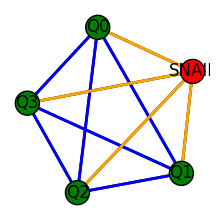

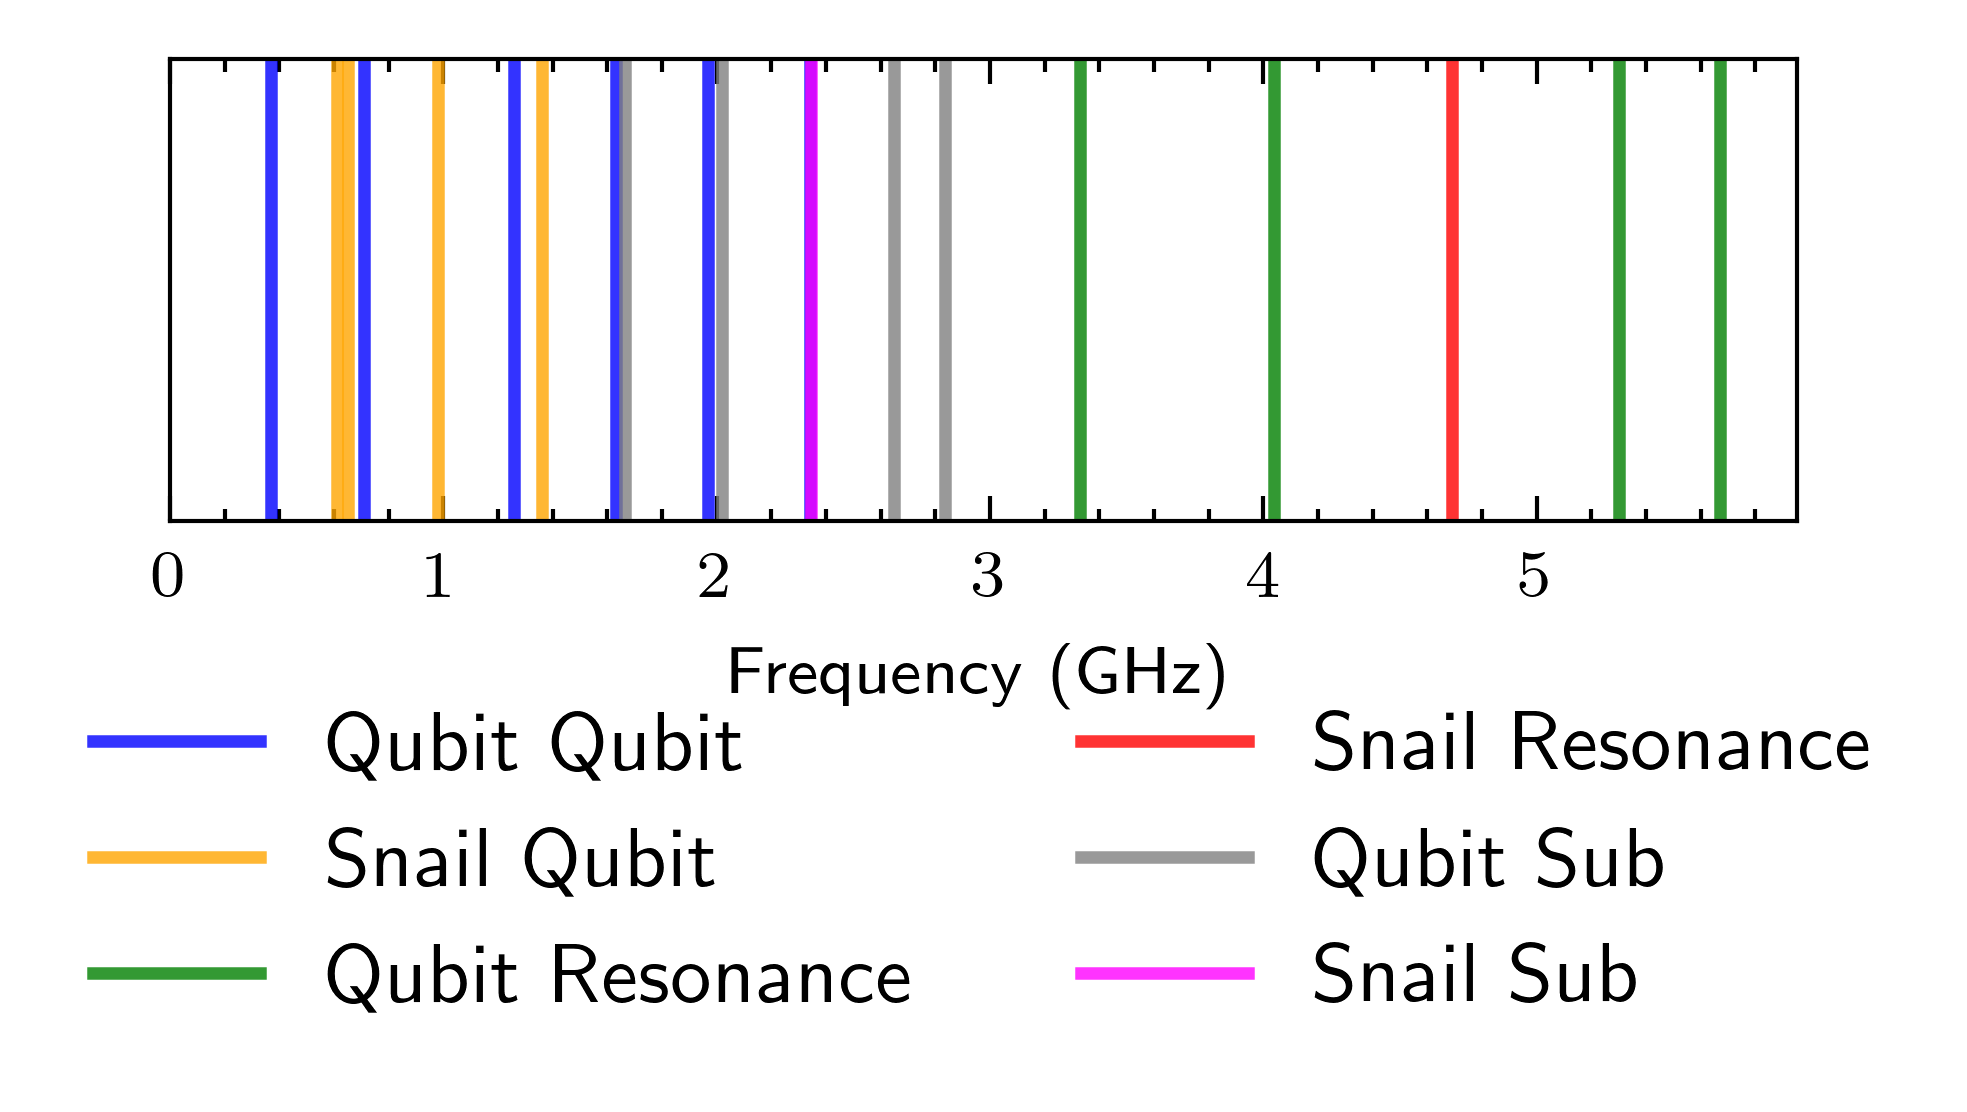

In [18]:
# baseline from Israa+Gaurav initial designs
module = QuantumModuleGraph(num_qubits=4)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
    use_lifetime=True,
)
optimizer.best_frequencies = [3.33, 5.67, 4.04, 5.30, 4.69]
# optimizer.best_frequencies = [3.33, 5.70, 5.13640275, 5.3, 4.69]
optimizer.report_results()

100%|██████████| 64/64 [00:05<00:00, 10.80it/s]

Optimization terminated successfully.
Qubit Frequencies: [3.87895344 4.07895344 5.64795706 5.32789447] GHz
SNAIL Frequency: 4.7 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 0.200000 GHz → Infidelity (no lifetime loss): 1.228584e-02, Infidelity (with lifetime loss): 1.348970e-02
  Gate ('Q0', 'Q2'): 1.769004 GHz → Infidelity (no lifetime loss): 1.314344e-02, Infidelity (with lifetime loss): 1.589168e-02
  Gate ('Q0', 'Q3'): 1.448941 GHz → Infidelity (no lifetime loss): 9.095748e-03, Infidelity (with lifetime loss): 1.128220e-02
  Gate ('Q1', 'Q2'): 1.569004 GHz → Infidelity (no lifetime loss): 7.883673e-03, Infidelity (with lifetime loss): 1.025774e-02
  Gate ('Q1', 'Q3'): 1.248941 GHz → Infidelity (no lifetime loss): 1.769503e-02, Infidelity (with lifetime loss): 1.961356e-02
  Gate ('Q2', 'Q3'): 0.320063 GHz → Infidelity (no lifetime loss): 2.198025e-02, Infidelity (with lifetime loss): 2.322590e-02

Average Gate Infidelity (no lifetime loss): 1.285072e-02
Average Gate Infidelity (with

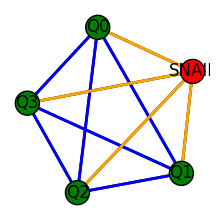

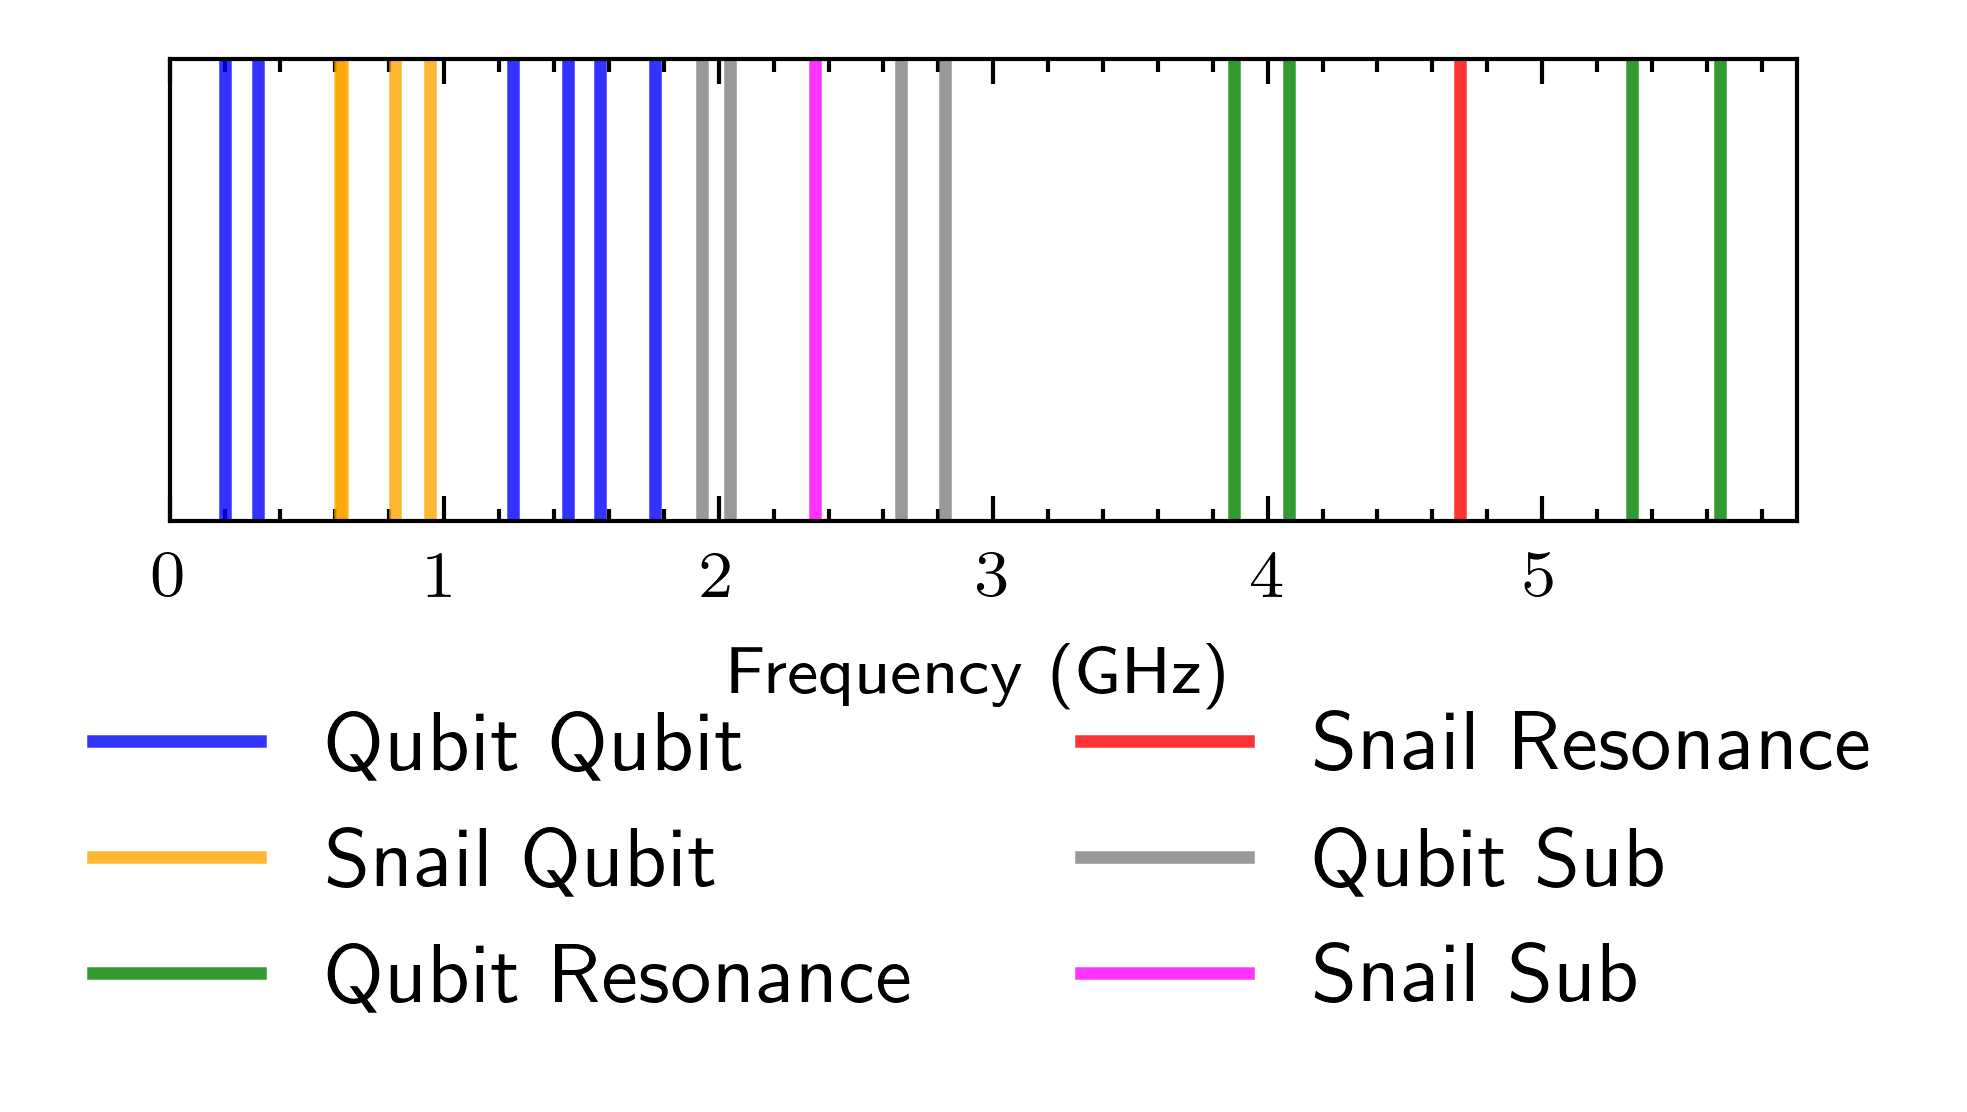

In [19]:
module = QuantumModuleGraph(num_qubits=4)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
    use_lifetime=True,
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

Remaining standard module sizes:

100%|██████████| 64/64 [00:00<00:00, 182.17it/s]

Optimization terminated successfully.
Qubit Frequencies: [5.7       5.4999982] GHz
SNAIL Frequency: 4.2 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 0.200002 GHz → Infidelity (no lifetime loss): 1.175721e-03, Infidelity (with lifetime loss): 2.512944e-03

Average Gate Infidelity (no lifetime loss): 1.175721e-03
Average Gate Infidelity (with lifetime loss): 2.512944e-03


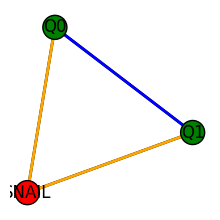

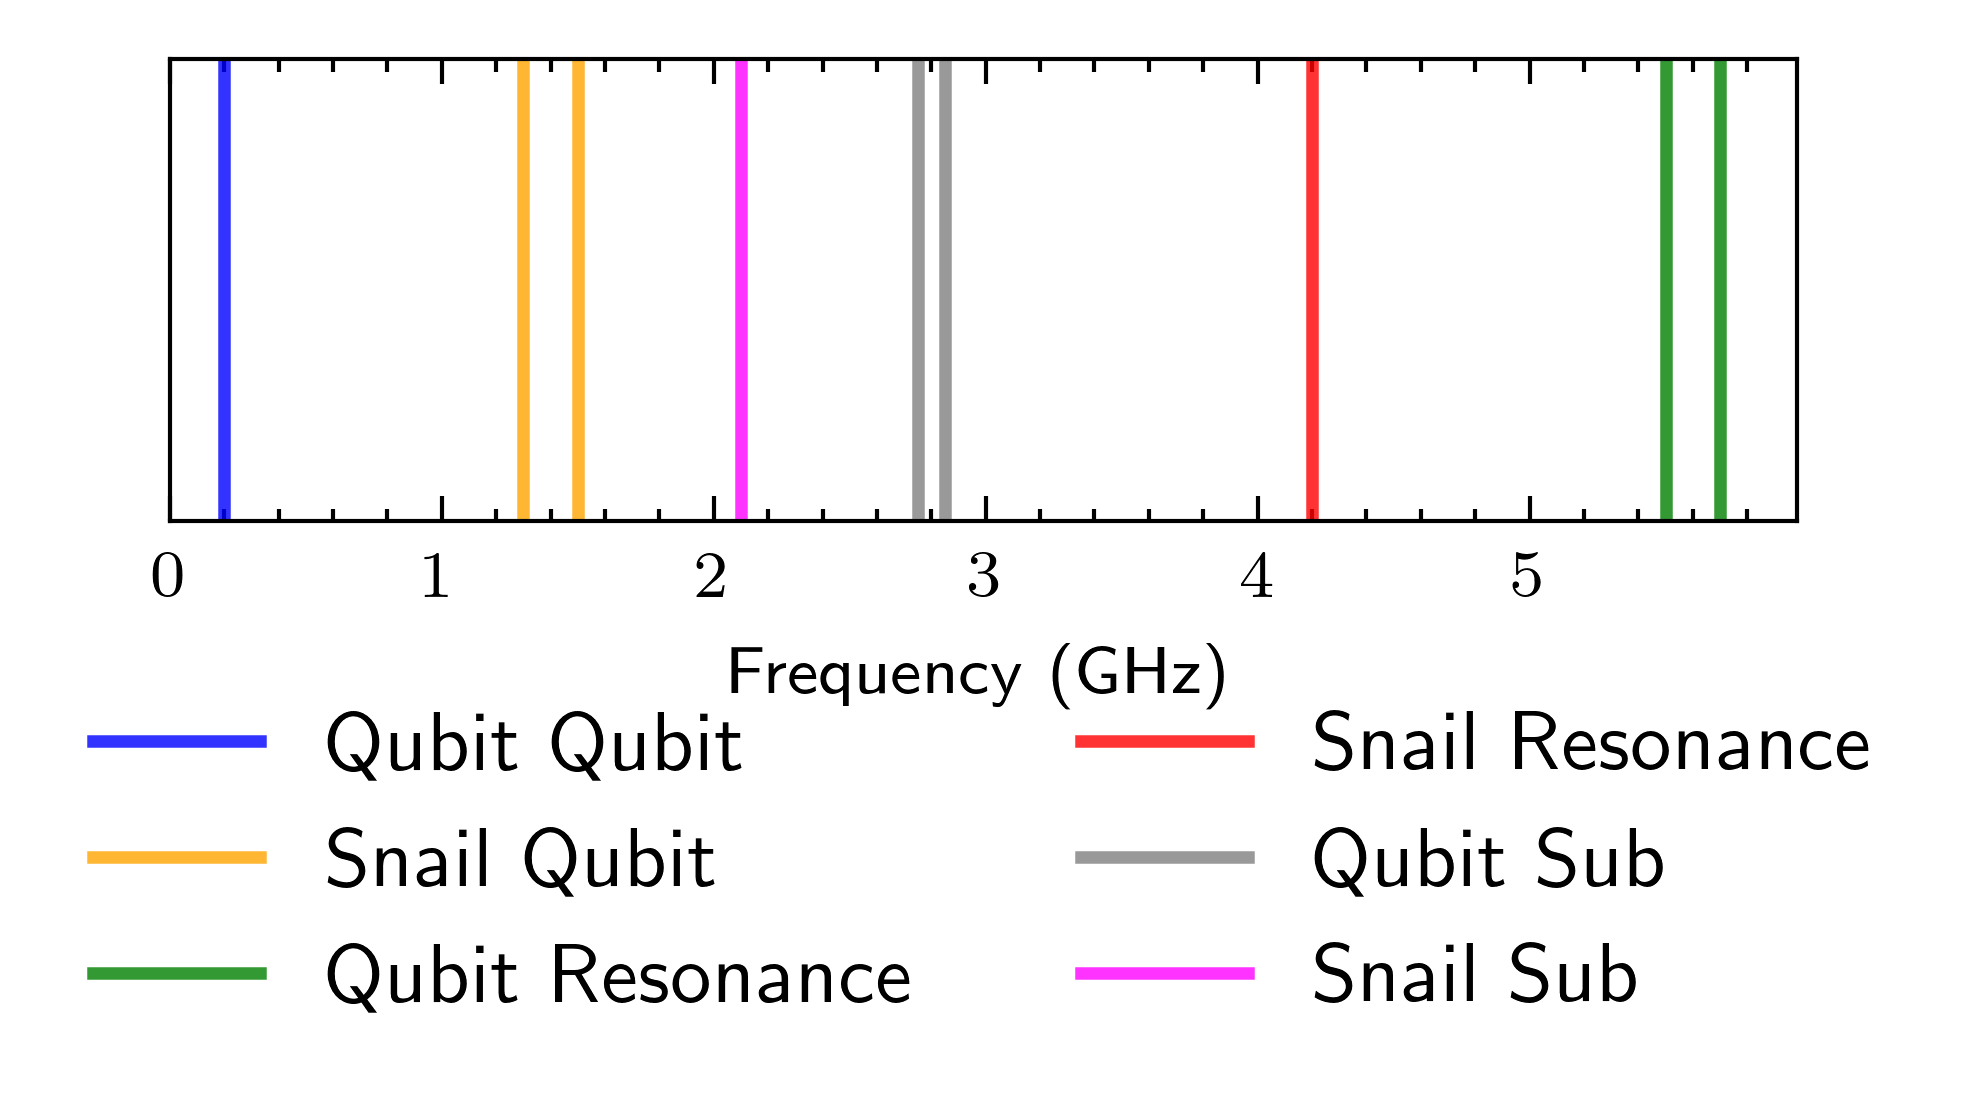

In [23]:
module = QuantumModuleGraph(num_qubits=2)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
    use_lifetime=True,
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

100%|██████████| 64/64 [00:01<00:00, 34.42it/s]

Optimization terminated successfully.
Qubit Frequencies: [5.37503089 5.1750136  5.6956411 ] GHz
SNAIL Frequency: 4.2 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 0.200017 GHz → Infidelity (no lifetime loss): 2.747193e-03, Infidelity (with lifetime loss): 4.082320e-03
  Gate ('Q0', 'Q2'): 0.320610 GHz → Infidelity (no lifetime loss): 3.637899e-03, Infidelity (with lifetime loss): 5.038317e-03
  Gate ('Q1', 'Q2'): 0.520628 GHz → Infidelity (no lifetime loss): 6.570230e-03, Infidelity (with lifetime loss): 8.092356e-03

Average Gate Infidelity (no lifetime loss): 4.034349e-03
Average Gate Infidelity (with lifetime loss): 5.500758e-03


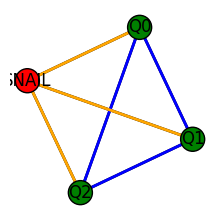

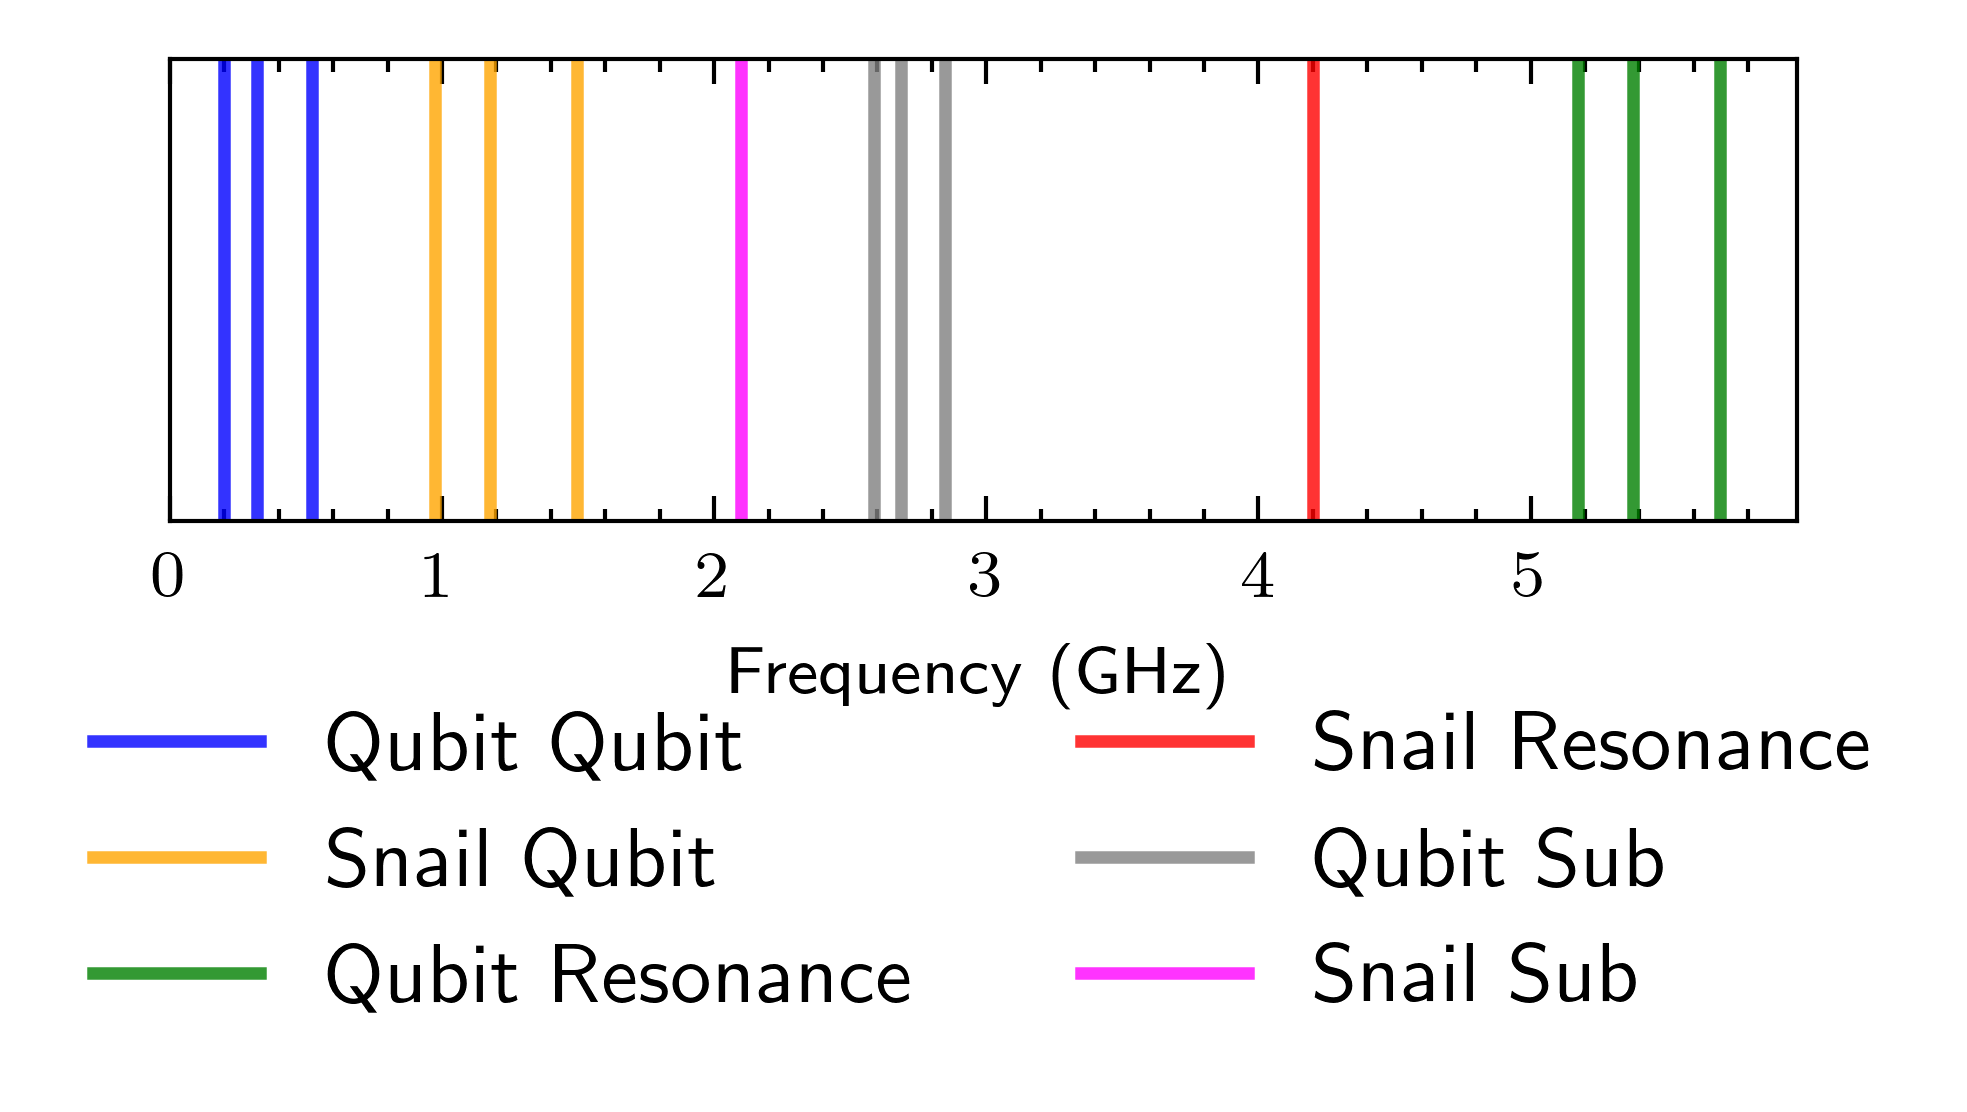

In [34]:
module = QuantumModuleGraph(num_qubits=3)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
    use_lifetime=True,
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

100%|██████████| 64/64 [00:13<00:00,  4.68it/s]

Optimization terminated successfully.
Qubit Frequencies: [3.64560535 5.39038775 4.80888474 5.61423506 3.30175784] GHz
SNAIL Frequency: 4.337110115730764 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 1.744782 GHz → Infidelity (no lifetime loss): 6.264163e-02, Infidelity (with lifetime loss): 6.563777e-02
  Gate ('Q0', 'Q2'): 1.163279 GHz → Infidelity (no lifetime loss): 1.690320e-01, Infidelity (with lifetime loss): 1.707494e-01
  Gate ('Q0', 'Q3'): 1.968630 GHz → Infidelity (no lifetime loss): 1.724718e-02, Infidelity (with lifetime loss): 2.122541e-02
  Gate ('Q0', 'Q4'): 0.343848 GHz → Infidelity (no lifetime loss): 5.609446e-02, Infidelity (with lifetime loss): 5.739676e-02
  Gate ('Q1', 'Q2'): 0.581503 GHz → Infidelity (no lifetime loss): 1.306112e-01, Infidelity (with lifetime loss): 1.319387e-01
  Gate ('Q1', 'Q3'): 0.223847 GHz → Infidelity (no lifetime loss): 1.938274e-02, Infidelity (with lifetime loss): 2.067288e-02
  Gate ('Q1', 'Q4'): 2.088630 GHz → Infidelity (no lifetime lo

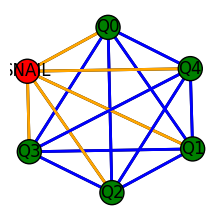

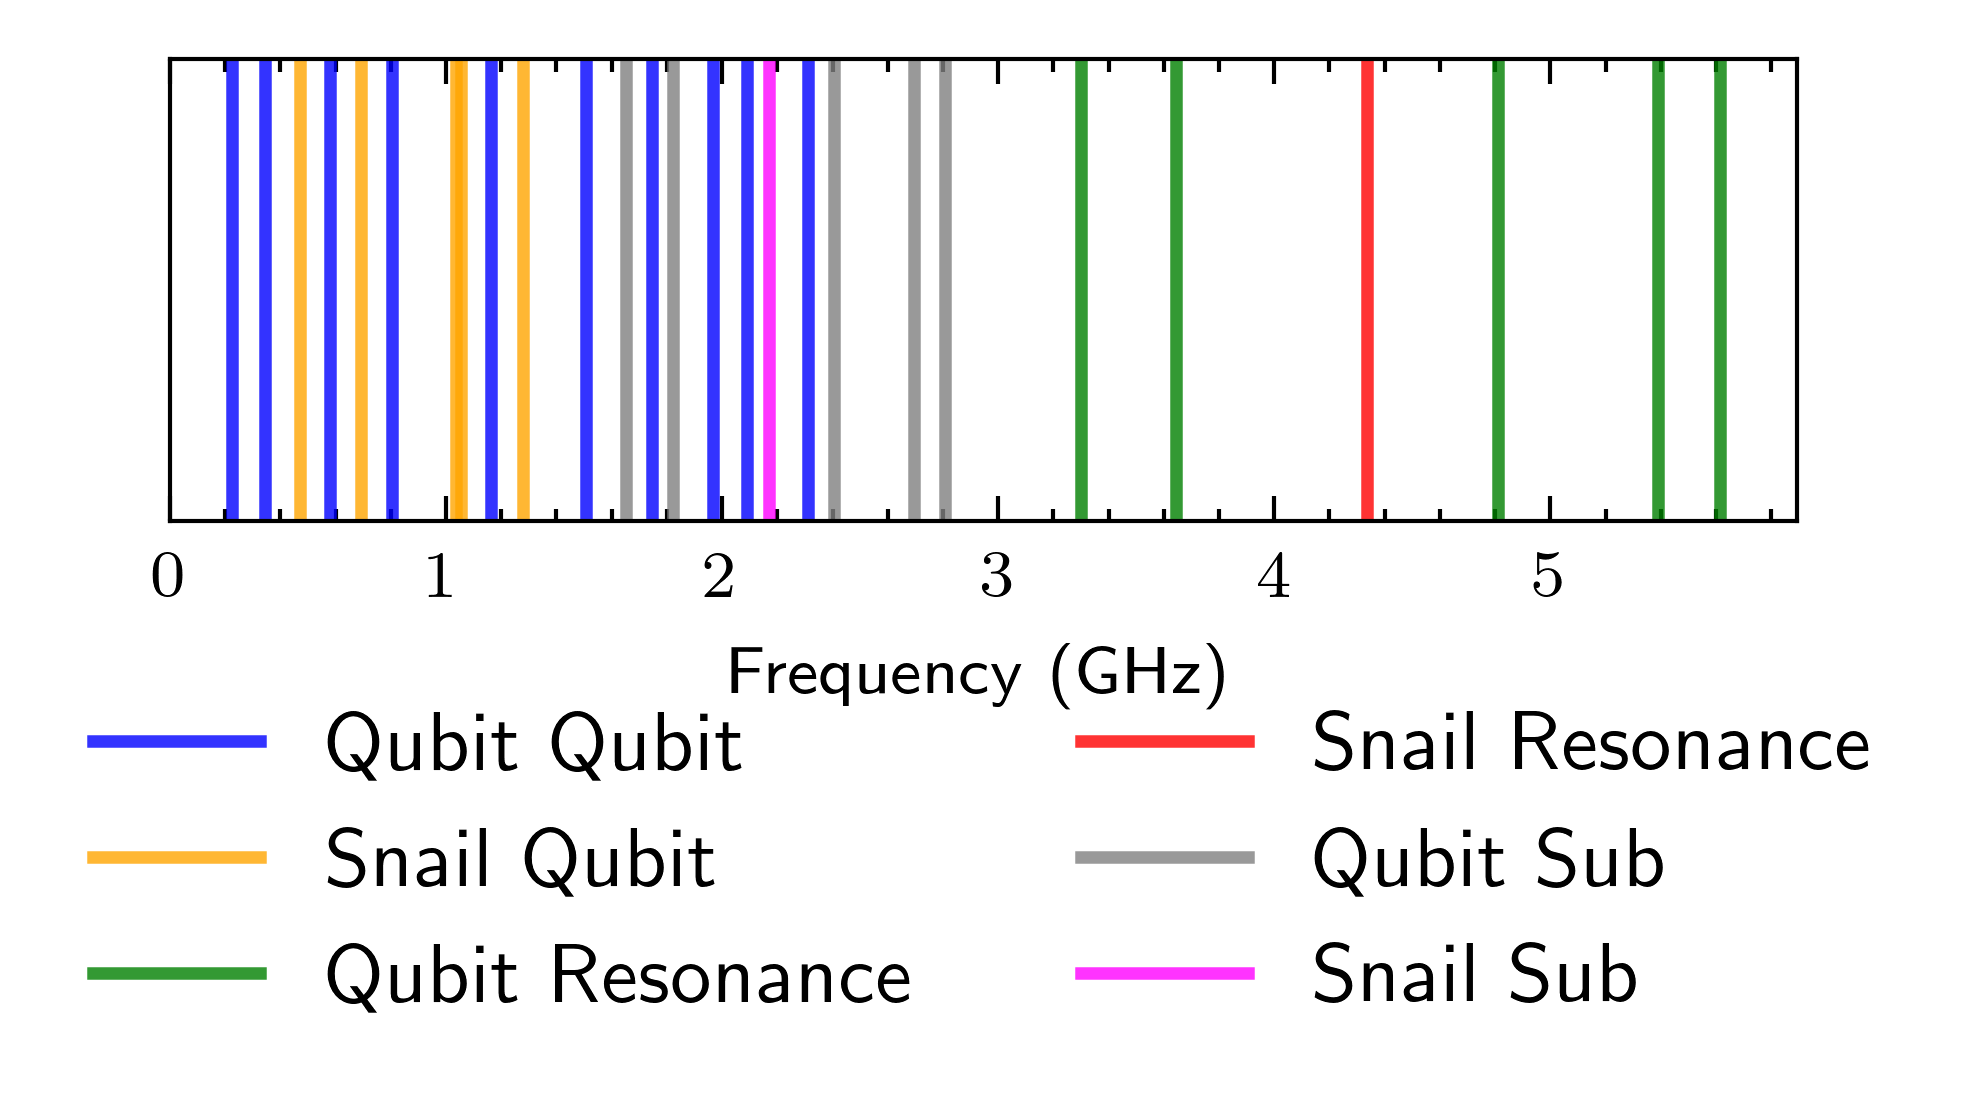

In [27]:
module = QuantumModuleGraph(num_qubits=5)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
    drop_k=0,
    use_lifetime=True,
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()